## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures. 

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [63]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from category_encoders import TargetEncoder

## Part 1: Data Visualization and Analysis

> "Visualization gives you answers to questions you didn’t know you had." ~ Ben Schneiderman
>

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is car_price.csv.


In [65]:
# Load the dataset
car_price_df = pd.read_csv('car_price.csv')

<b> 1.1 Plot the distribution of the following features as a small multiple of histograms. </b>
1. carlength 
2. carwidth
3. stroke 
4. curbweight

<b></b>

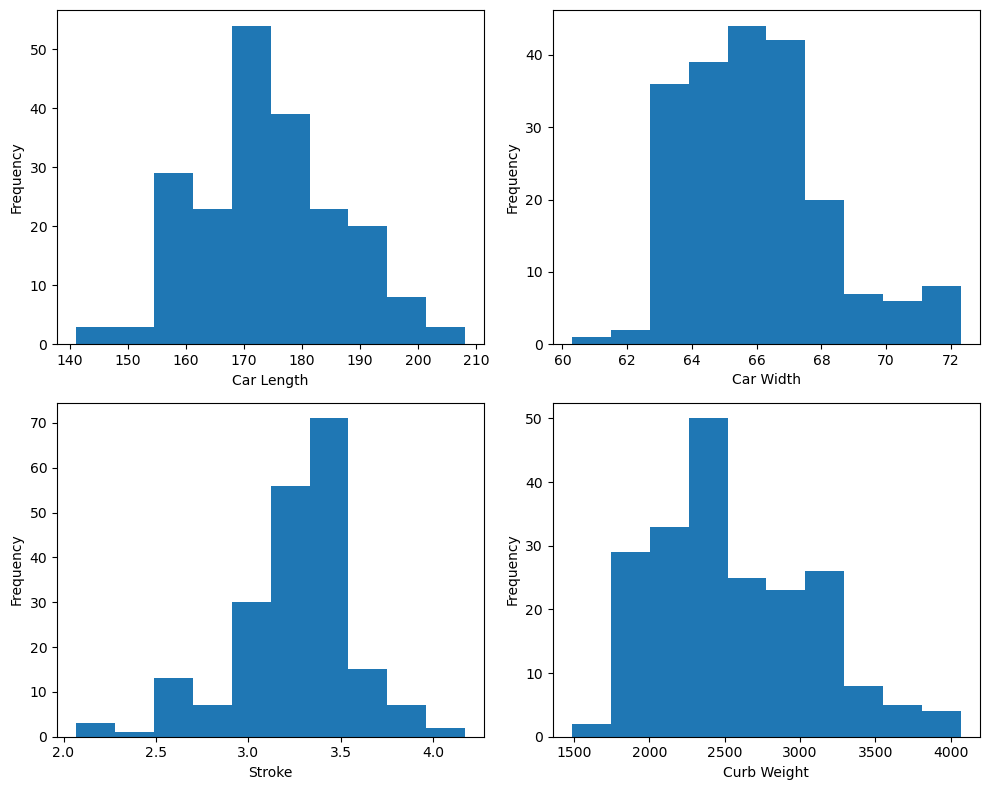

In [66]:
### Code here
carlength = car_price_df['carlength']
carwidth = car_price_df['carwidth']
stroke = car_price_df['stroke']
curbweight = car_price_df['curbweight']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(carlength)
axs[0, 0].set_xlabel("Car Length")
axs[0, 0].set_ylabel("Frequency")

axs[0, 1].hist(carwidth)
axs[0, 1].set_xlabel("Car Width")
axs[0, 1].set_ylabel("Frequency")

axs[1, 0].hist(stroke)
axs[1, 0].set_xlabel("Stroke")
axs[1, 0].set_ylabel("Frequency")

axs[1, 1].hist(curbweight)
axs[1, 1].set_xlabel("Curb Weight")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables </b>
1. fueltype 
2. drivewheel
3. enginelocation


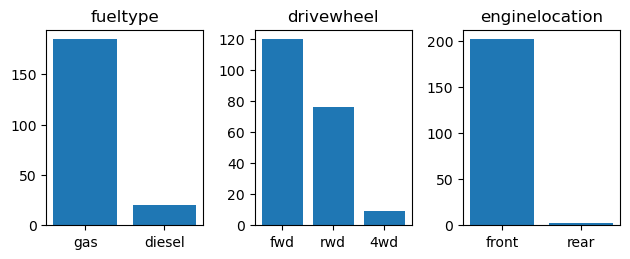

In [67]:
### Code here
features = car_price_df[['fueltype','drivewheel','enginelocation']]
num_feature = len(features.columns)
for i, feature in enumerate(features.columns):
    plt.subplot(2, num_feature, i+1)
    cnt = features[feature].value_counts()
    plt.bar(cnt.index, cnt.values)
    plt.title(feature)
plt.tight_layout()
plt.show()

<b> 1.3 Plot relationships between the following features and the target variable <em>price</em> as a small multiple of boxplots. </b>
1. cylindernumber 
2. enginetype

<b> Note: Make sure to order the x-axis labels in increasing order for cylindernumber. </b>

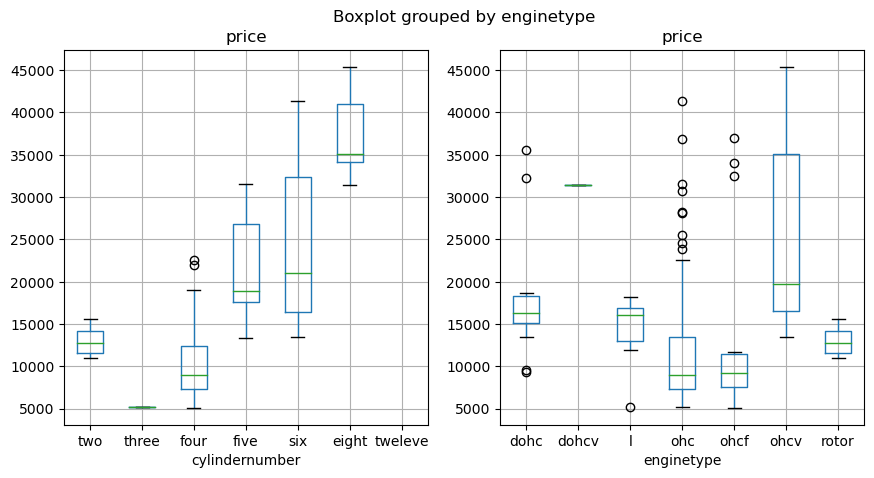

In [68]:
### Code here
#check all the unique value sof cylindernumber
car_price_df['cylindernumber'].unique()

# sort the values in cylinderNumber
cylinder_order = ['two', 'three','four','five','six','eight','tweleve']
car_price_df['cylindernumber'] = pd.Categorical(car_price_df['cylindernumber'], categories=cylinder_order, ordered=True)
sorted_df = car_price_df.sort_values(by='cylindernumber')

#plot the boxplots 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sorted_df.boxplot(column='price', by='cylindernumber', ax=ax[0])
car_price_df.boxplot(column='price', by='enginetype', ax=ax[1])
plt.show()



<b> 1.4 What do you infer from the visualization above. Comment on the skewness of the distributions (histograms), class imbalance (bar charts), and relationship between categories and price of the car (boxplots). </b>

In [69]:
#### Comment here
carlength_skewness = car_price_df['carlength'].skew()
carwidth_eiskewness = car_price_df['carwidth'].skew()
stroke_skewness = car_price_df['stroke'].skew()
curbweight_skewness = car_price_df['curbweight'].skew()

print("The carlength_skewness of the distribution is:", carlength_skewness)
print("The carwidth_eiskewness of the distribution is:", carwidth_eiskewness)
print("The stroke_skewness of the distribution is:",stroke_skewness)
print("The curbweight_skewness of the distribution is:",curbweight_skewness)


# carlength: A skewness value of 0.1559 indicates that the distribution of the carlength feature is relatively symmetric.

# carwidth: A skewness value of 0.904 indicates that the distribution of the carwidth feature is positively skewed. This means that there are more values on the positive side of the mean than on the negative side of the mean.

# stroke: A skewness value of -0.6897 indicates that the distribution of the stroke feature is negatively skewed. This means that there are more values on the negative side of the mean than on the positive side of the mean.

# weight: A skewness value of 0.681 indicates that the distribution of the weight feature is positively skewed. This means that there are more values on the positive side of the mean than on the negative side of the mean

The carlength_skewness of the distribution is: 0.1559537713215604
The carwidth_eiskewness of the distribution is: 0.904003498786254
The stroke_skewness of the distribution is: -0.6897045784233837
The curbweight_skewness of the distribution is: 0.681398189052588


------------------------------------------------------------------------------------------------------------------

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression
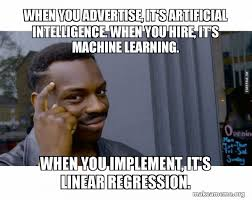



In part 1, we will use two datasets - synthetic and Car Price to train and evaluate our linear regression model.

### Synthetic Data

<b>2.1.1 Generate 100 samples of synthetic data using the following equations. </b>

$ \epsilon ∼ \mathcal{N}(0,4) $

$ y = 7x - 8 + \epsilon $

You may use [np.random.normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for generating $\epsilon$. 

In [70]:
np.random.seed(0)
X = np.linspace(0, 15, 100)
epsilon = np.random.normal(0, 4, size = 100) 
y = 7 * X - 8 + epsilon

To apply linear regression, we need to first check if the assumptions of linear regression are not violated.

Assumptions of Linear Regression:

*   Linearity:  is a linear (technically affine) function of $x$.
*   Independence: the $x$'s are independently drawn, and not dependent on each other.
*   Homoscedasticity: the $\epsilon$'s, and thus the $y$'s, have constant variance.
*   Normality: the $\epsilon$'s are drawn from a Normal distribution (i.e. Normally-distributed errors)

These properties, as well as the simplicity of this dataset, will make it a good test case to check if our linear regression model is working properly.

**2.1.2 Plot y vs X in the synthetic dataset as a scatter plot. Label your axes and make sure your y-axis starts from 0. Do the features have linear relationship?**

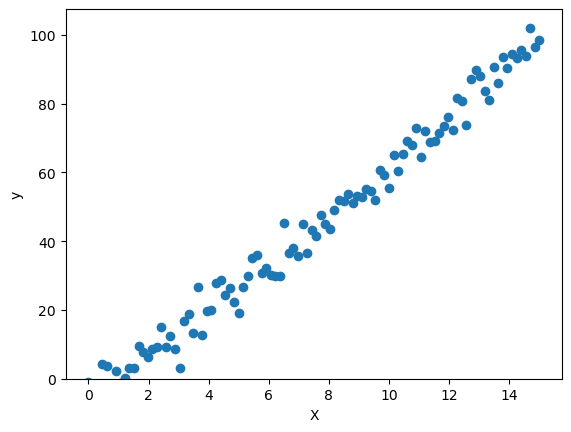

In [71]:
### Code here
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel('y')
plt.ylim(bottom = 0)
plt.show()

In [72]:
#### Comment here
#the linear relationship between X and y can be visualized as a straight line with a slope of 7 and a y-intercept of -8. 
#The noise in the data can be seen as deviations from this line.

### Car Price Prediction Dataset

The objective of this dataset is to predict the price of a car based on its characterisitics. We will use linear regression to predict the price using its features. 

In [73]:
# split data into features and labels
car_price_X = car_price_df.drop(columns=['price'])
car_price_y = car_price_df['price']

**2.1.3 Plot the relationships between the label (price) and the continuous features (citympg, highwaympg, enginesize, horsepower) using a small multiple of scatter plots. Make sure to label the axes.**

Text(0, 0.5, 'Price')

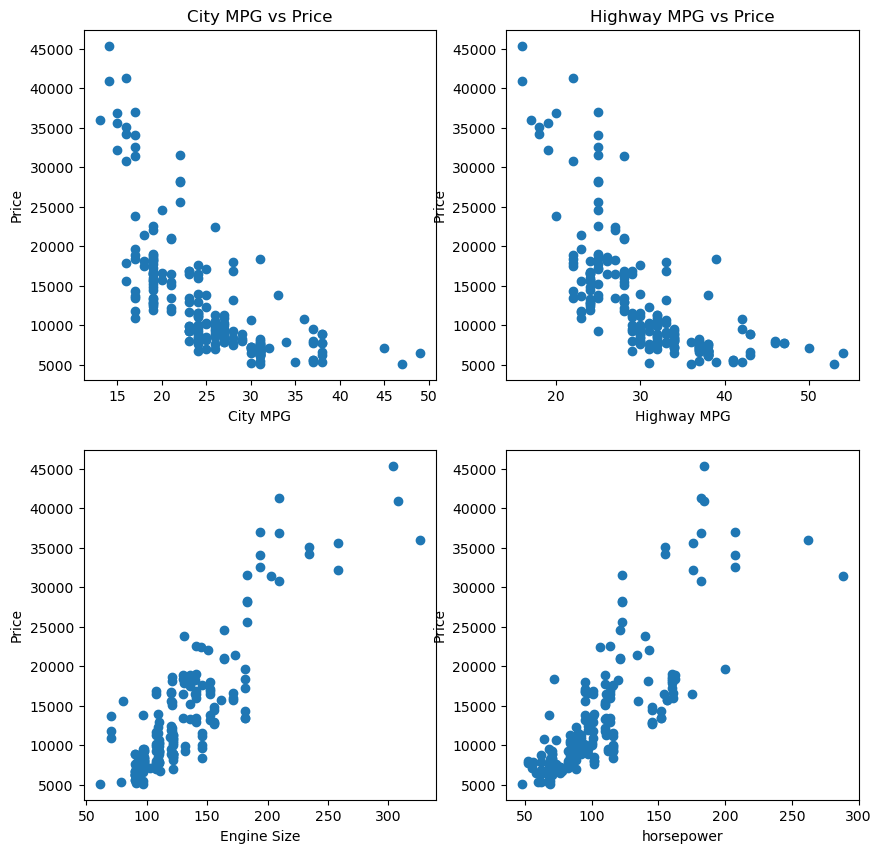

In [74]:
### Code here
# Create a subplot with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

# citympg vs price
axs[0].scatter(car_price_df['citympg'], car_price_df['price'])
axs[0].set_xlabel("City MPG")
axs[0].set_ylabel("Price")
axs[0].set_title("City MPG vs Price")

# highwaympg vs price
axs[1].scatter(car_price_df['highwaympg'], car_price_df['price'])
axs[1].set_xlabel("Highway MPG")
axs[1].set_ylabel("Price")
axs[1].set_title("Highway MPG vs Price")

#enginesize vs price 
axs[2].scatter(car_price_df['enginesize'], car_price_df['price'])
axs[2].set_xlabel("Engine Size")
axs[2].set_ylabel("Price")


#horsepower vs price 
axs[3].scatter(car_price_df['horsepower'], car_price_df['price'])
axs[3].set_xlabel("horsepower")
axs[3].set_ylabel("Price")


**2.1.4 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [75]:
#### Comment here
#Linear regression can still be a good model for this problem, even if there are both positive and negative relationships between the features and labels.
#However, it's important to assess whether the assumptions of linear regression are met, such as linearity, independence, homoscedasticity, and normality of errors

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

The processing steps on the synthetic dataset have been provided for you below as a reference:

**Note: Generate the synthetic data before running the next cell to avoid errors.**


In [76]:
X = X.reshape((100, 1))   # Turn the X vector into a feature matrix X

# 1. No categorical features in the synthetic dataset (skip this step)

# 2. Only one feature vector

# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

print(X_train[:5], '\n\n', y_train[:5])

[[ 1.          0.53651502]
 [ 1.         -1.00836082]
 [ 1.         -0.72094206]
 [ 1.         -0.25388657]
 [ 1.          0.64429705]] 

 [55.47920661 13.42527931 26.39143796 36.62805794 65.38959977]


**2.1.5 Encode the categorical variables of the CarPrice dataset.**

In [77]:
### Code here
#encode the categorical values 
catCols = car_price_df.select_dtypes('object')
cat_cols = car_price_df[catCols.columns]
one_hot_encoder = pd.get_dummies(cat_cols.drop('CarName',axis = 1 ))

encoder = TargetEncoder()
encoded_col = encoder.fit_transform(car_price_df['CarName'], car_price_df['price'])

num_cols = car_price_df.select_dtypes(include=['int64', 'float64'])

car_price_df_encoded = pd.concat([encoded_col, one_hot_encoder, num_cols], axis = 1)


**2.1.6 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

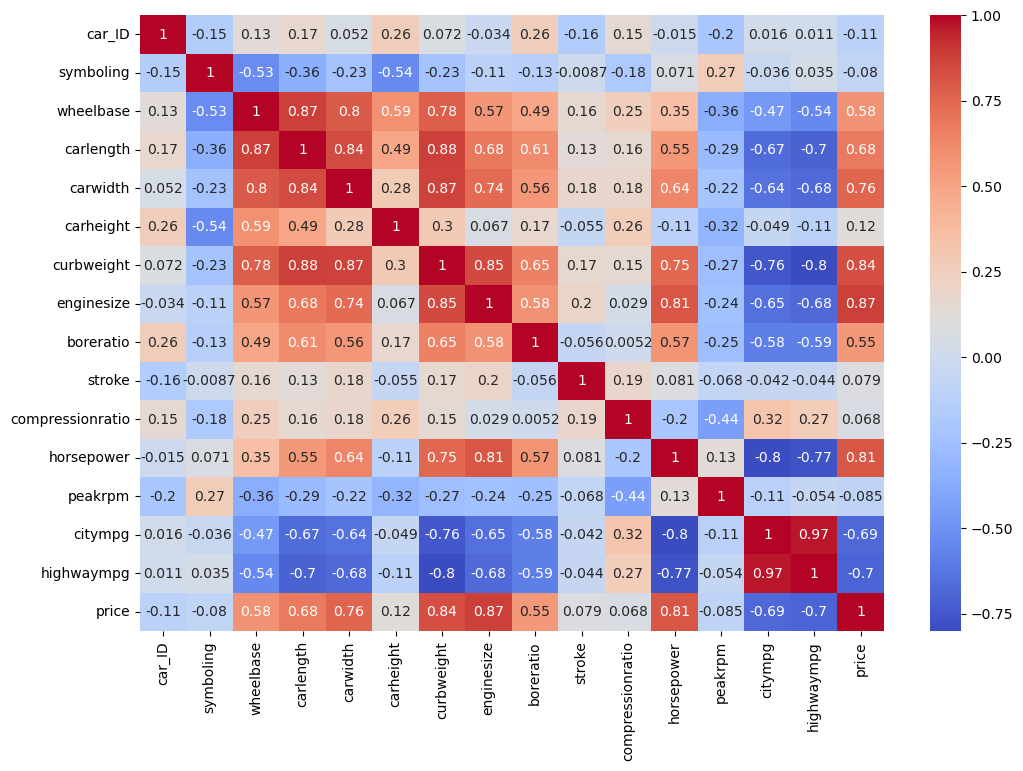

In [78]:
### Code here
numerical_features = car_price_df.select_dtypes(include=['int64', 'float64'])
corr = numerical_features.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot= True, cmap = 'coolwarm')
plt.show()


In [79]:
#i drop the column highwaympg, the corr between highwaympg and citympg is .97 
# car_price_df = car_price_df_encoded.drop('highwaympg', axis = 1)
car_price_df_encoded=car_price_df_encoded.drop('highwaympg', axis = 1)
car_price_X = car_price_df_encoded.drop(columns=['price'])
car_price_y = car_price_df_encoded['price']

In [80]:
#### Comment here
#because one of the assumption that linear regression models work is that all features are independent 

**2.1.7 Split the dataset into training (60%), validation (20%), and test (20%) sets. Use random_state = 0.**

In [81]:
### Code here
car_price_X_dev, car_price_X_test, car_price_y_dev, car_price_y_test = train_test_split(car_price_X, car_price_y, test_size=0.2, random_state=0)
car_price_X_train, car_price_X_val, car_price_y_train, car_price_y_val = train_test_split(car_price_X_dev, car_price_y_dev, test_size=0.25, random_state=0)


**2.1.8 Standardize the columns in the feature matrices.**

In [82]:
### Code here
scaler = StandardScaler()
car_price_X_train = scaler.fit_transform(car_price_X_train)   # Fit and transform scalar on X_train
car_price_X_val = scaler.transform(car_price_X_val)           # Transform X_val
car_price_X_test = scaler.transform(car_price_X_test)         # Transform X_test

**2.1.9 Add a column of ones to the feature matrices for the bias term.**

In [83]:
### Code here
car_price_X_train = np.hstack([np.ones((car_price_X_train.shape[0], 1)), car_price_X_train])
car_price_X_val = np.hstack([np.ones((car_price_X_val.shape[0], 1)), car_price_X_val])
car_price_X_test = np.hstack([np.ones((car_price_X_test.shape[0], 1)), car_price_X_test])


At the end of this pre-processing, you should have the following vectors and matrices: 
- Syntheic dataset: X_train, X_val, X_test, y_train, y_val, y_test
- Car Price Prediction dataset: car_price_X_train, car_price_X_val, car_price_X_test, car_price_y_train, car_price_y_val, car_price_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.10 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [84]:
class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=1e-13):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        None
        '''
        ### Your code here
        X = np.c_[np.ones(X.shape[0]), X]
        # Compute the optimal weight vector using Ridge Regression closed-form solution
        I = np.eye(X.shape[1])
        I[0, 0] = 0  # Do not regularize the bias term
        self.w = np.linalg.inv(X.T @ X + self.alpha * I) @ X.T @ y
       
        
    def predict(self, X):
        '''Predicts on X using trained model.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        ### Your code here
        # Add a column of ones to X to account for the bias term
        X = np.c_[np.ones(X.shape[0]), X]
        # Predict using the trained model
        y_pred = X @ self.w
        return y_pred
    def feature_importances_(self):
        # Return the absolute values of the model weights
        return np.abs(self.w[1:])
        

### Train, Evaluate, and Interpret LR Model

**2.1.11 Using your `LinearRegression` implementation above, train a vanilla linear regression model ($\alpha = 0$) on (X_train, y_train) from the synthetic dataset. Use this trained model to predict on X_test. Report the first 3 and last 3 predictions on X_test, along with the actual labels in y_test.**

In [85]:
### Code here
lr = LinearRegression()
lr.train(X_train, y_train)
y_pred = lr.predict(X_test[:1])
weights = lr.w

print("The first and last predictions: ", y_pred[:3], y_pred[-3:])
print("Actual labels:", y_test[:3], y_test[-3:])

The first and last predictions:  [22.31513896] [22.31513896]
Actual labels: [19.75879164 87.9272395  -1.96383594] [26.53356395 19.07681413  0.07197308]


**2.1.12 Plot a scatter plot of y_test vs. X_test (just the non-ones column). Then, using the weights from the trained model above, plot the best-fit line for this data on the same figure.** 

>If your line goes through the data points, you have likely implemented the linear regression correctly!

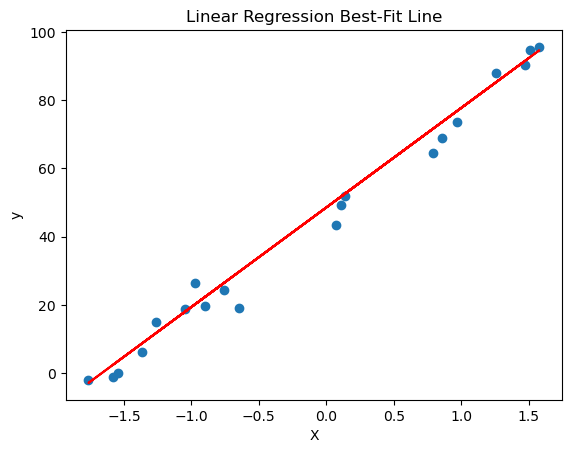

In [86]:
### Code here
lr = LinearRegression(alpha=1e-13)
lr.train(X_train, y_train)

# Get predictions on test set
y_pred = lr.predict(X_test)

# Plot best-fit line on scatter plot of test set
plt.scatter(X_test[:, 1], y_test)
plt.plot(X_test[:, 1], y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Best-Fit Line')
plt.show()

**2.1.13 Train a linear regression model ($\alpha = 0$) on the car price training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [87]:
### Code here
#Train linear regression model
model = LinearRegression(alpha = 1e-13) # alpha = 0 result in singular metrix so i use 1e -13 instead
model.train(car_price_X_train, car_price_y_train)
car_price_y_pred = model.predict(car_price_X_test)

# Calculate R^2 scores on training, validation, and test sets
print('Training R^2:', r2_score(car_price_y_train, model.predict(car_price_X_train)))
print('Validation R^2:', r2_score(car_price_y_val, model.predict(car_price_X_val)))
print('Test R^2:', r2_score(car_price_y_test, car_price_y_pred))

# Report first 3 and last 3 predictions on test set
print('First 3 predictions on test set:', car_price_y_pred[:3])
print('First 3 actual labels on test set:', car_price_y_test[:3])
print('Last 3 predictions on test set:', car_price_y_pred[-3:])
print('Last 3 actual labels on test set:', car_price_y_test[-3:])

Training R^2: 0.9563407019218897
Validation R^2: 0.929965533839779
Test R^2: 0.9320158572838925
First 3 predictions on test set: [ 5843.23775093 18279.97091124 13233.68489587]
First 3 actual labels on test set: 52      6795.0
181    15750.0
5      15250.0
Name: price, dtype: float64
Last 3 predictions on test set: [ 5528.73584247 41364.17382543  6155.00276293]
Last 3 actual labels on test set: 22     6377.0
74    45400.0
44     8916.5
Name: price, dtype: float64


**2.1.14 As a baseline model, use the mean of the training labels (car_price_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.** 

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [88]:
### Code here
#As we can see from the data below, the R^2 of the baseline is much lower than the R^2 of the trained model above
mean_train_y = np.mean(car_price_y_train)
mean_y_train_pred = np.full(car_price_y_train.shape, mean_train_y)
mean_y_val_pred = np.full(car_price_y_val.shape, mean_train_y)
mean_y_test_pred = np.full(car_price_y_test.shape, mean_train_y)

print("Baseline R^2 on the training set: {:.4f}".format(r2_score(car_price_y_train, mean_y_train_pred)))
print("Baseline R^2 on the validation set: {:.4f}".format(r2_score(car_price_y_val, mean_y_val_pred)))
print("Baseline R^2 on the test set: {:.4f}".format(r2_score(car_price_y_test, mean_y_test_pred)))

Baseline R^2 on the training set: 0.0000
Baseline R^2 on the validation set: -0.0425
Baseline R^2 on the test set: -0.0028


2.1.15 Interpret your model trained on the car price dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term! 

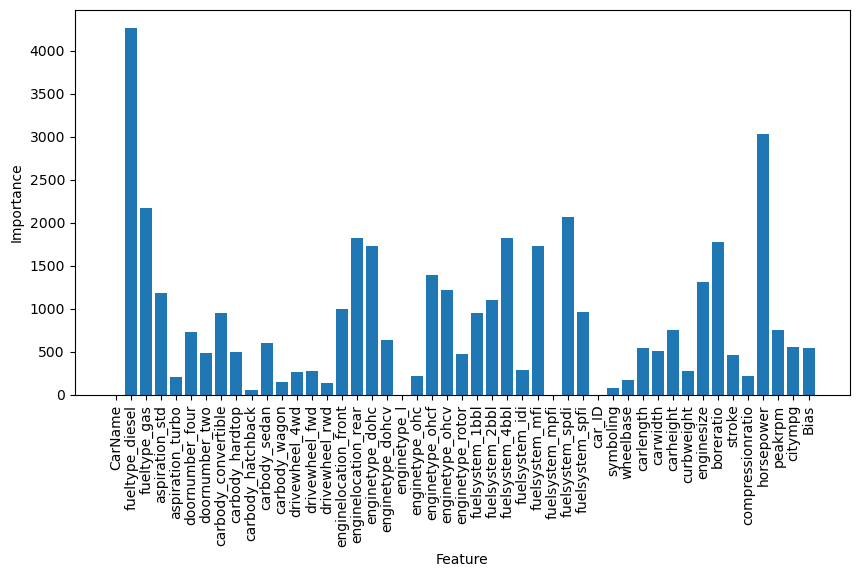

In [89]:
importances = model.feature_importances_() # I implemented feature_importances_() in LinearReggresion class 
# Get the feature names
feature_names = list(car_price_df_encoded.columns[:-1]) + ['Bias']

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 5))
plt.bar(feature_names, importances)
plt.xlabel('Feature', fontsize=10)
plt.ylabel('Importance', fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

**2.1.16 According to your model, which features are the greatest contributors to the car price?**

In [90]:
#### Comment here
#from the plot above it shows that CarName is the greaest contribution to the car price 

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the car price dataset.

**2.1.17 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

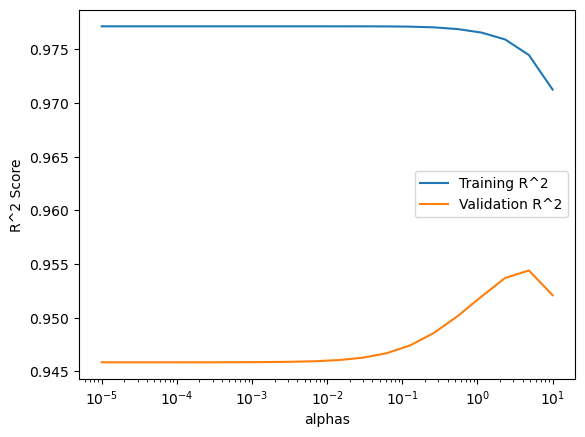

In [91]:
### Code here
# Define the range of alphas to sweep out
alphas = np.logspace(-5, 1, 20)

# Initialize arrays to store the training and validation R^2 scores
train_scores = np.zeros(len(alphas))
val_scores = np.zeros(len(alphas))

# Loop over the alphas and fit the model
for i, alpha in enumerate(alphas):
    model = LinearRegression(alpha=alpha)
    model.train(car_price_X_train, car_price_y_train)
    train_scores[i] = r2_score(car_price_y_train, model.predict(car_price_X_train))
    val_scores[i] = r2_score(car_price_y_val, model.predict(car_price_X_val))

# Plot the training and validation R^2 scores
plt.semilogx(alphas, train_scores, label='Training R^2')
plt.semilogx(alphas, val_scores, label='Validation R^2')
plt.xlabel('alphas')
plt.ylabel('R^2 Score')
plt.legend()
plt.show()

**2.1.18 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [92]:
#### Comment here
#AS the alpha value increases, the model complexity decresses, the model become less sensitive to the training data.
#Both the trainining and validataion R^2 scores will continue to decrease as we can see from the plot, as the model becomes 
#too simple to caputre the underlying patterns in the data. The best alpha is where the R^2 reaches its maximum meaning 
#the best balance between underfitting and overfitting

### 2.2 Logistic Regression

In this part, we will be using a heart disease dataset for classification. 

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides information about patients, over 4,000 records and 15 attributes.


**Variables:**

Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

Demographic:
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral:
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history):
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

Predict variable (desired target):
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [23]:
heart_disease_df = pd.read_csv('heart_disease.csv')


#### Missing Value Analysis

**2.2.1 Are there any missing values in the dataset? If so, what can be done about it? (Think if removing is an option?)**

In [24]:
### Code here
heart_disease_df.isnull().sum()

#fill all missing values with mean
cols = ['education', 'cigsPerDay','BPMeds','totChol','BMI','glucose','heartRate']
heart_disease_df[cols] = heart_disease_df[cols].fillna(heart_disease_df[cols].mean())

In [9]:
#### Comment here
#there are some missing values and i chose to fill them with mean. The column which miss the most values is education and
#education is an important feature in this case, therefore i chose not to remove any column

**2.2.2 Do you think that the distribution of labels is balanced? Why/why not? 
Hint: Find the probability of the different categories.**

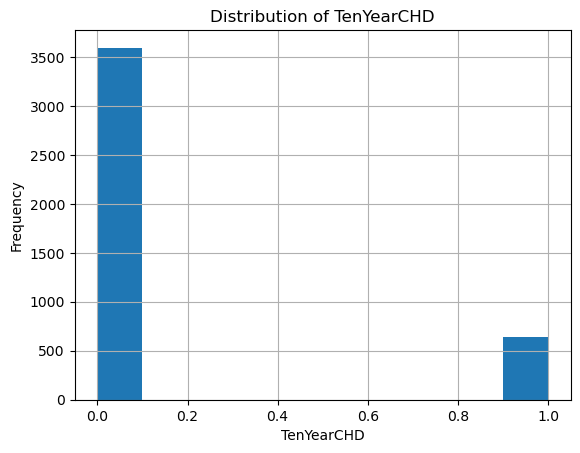

In [10]:
### Code here
heart_disease_df['TenYearCHD'].hist()
plt.xlabel('TenYearCHD')
plt.ylabel('Frequency')
plt.title('Distribution of TenYearCHD')
plt.show()

In [11]:
#### Comment here
#its def not balanced of the distribution of labels as we can see from the plot above. Majority of the cases are 0(negative) 
#only very few of them are 1(positive)

**2.2.3 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

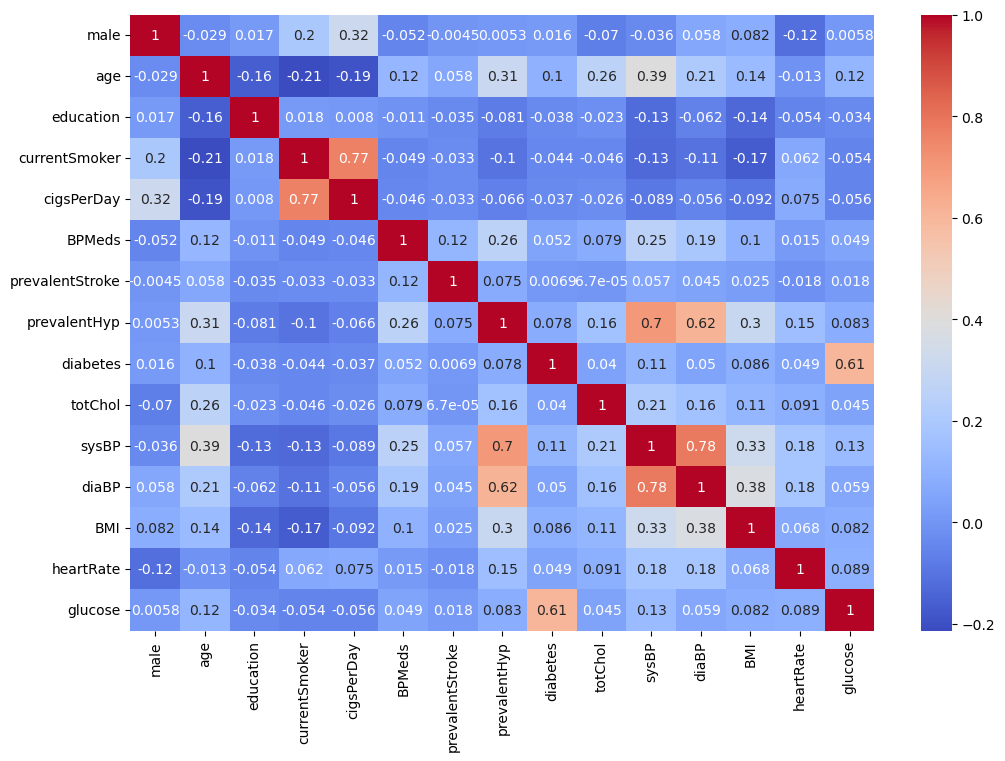

In [25]:
### Code here
X = heart_disease_df.iloc[:, :-1]
y = heart_disease_df.iloc[:, -1]
corr = X.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [26]:
#### Comment here
# All the corr between feature and label is less than .9, then i'll keep all the features 

**2.2.4 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [27]:
#1. convet the label from a pandas series to a Numpy(m * 1)
y = y.values
# 3. Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)

# 4. Standardize the columns in the feature matrices
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform scalar on X_train
X_val = scaler.transform(X_val)           # Transform X_val
X_test = scaler.transform(X_test)         # Transform X_test

# 5. Add a column of ones to the feature matrices
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


### Implement Logistic Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
> 
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [28]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''
    
    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent 
        (sets w to its optimal value).
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''
        
        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t): 
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss
        
    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold 
        the predicted probability to return a 0 or 1 prediction.
        
        Parameters
        ----------
        X : (m x n) feature matrix
        
        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred
    
    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w, 
        and alpha. Useful as a helper function for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2
    
    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss 
        using X, y, w, and alpha. Useful as a helper function 
        for train().
        
        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector
        
        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w        
            
    
    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x. 
        Useful as a helper function for predict(), calculate_loss(), 
        and calculate_gradient().
        
        Parameters
        ----------
        x: (m x 1) vector
        
        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))
    def feature_importances_(self):
        # Return the absolute values of the model weights
        return np.abs(self.w[1:])

**2.2.5 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

A: Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the voice recognition training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge. 

B: Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

C. Compare accuracy on the test dataset for both the scenarios.

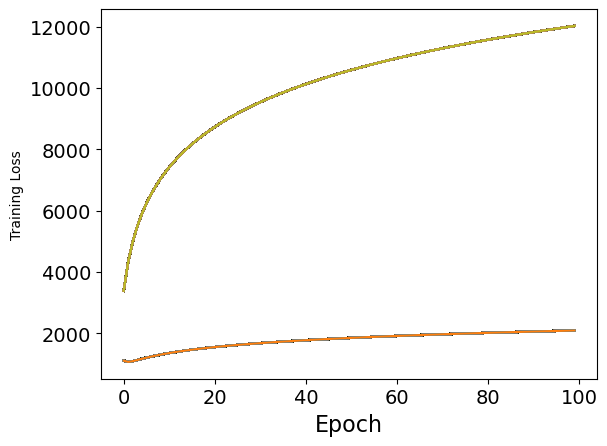

In [29]:
### Code here
#A
logReg = LogisticRegression(alpha=0, t=100, eta=1e-3)
loss = logReg.train(X_train, y_train)
# Plot the training loss over epochs
plt.plot(range(len(loss)), loss)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Training Loss')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [17]:
#B
import random
def random_search(X_train, y_train, num_iters=20):
    best_alpha = 0
    best_eta = 0
    best_t = 0
    best_loss = float('inf')
    
    for i in range(num_iters):
        alpha = random.uniform(0, 1)
        eta = random.uniform(0, 0.001)
        t = random.randint(0, 100)
        
        model = LogisticRegression(alpha=alpha, t=t, eta=eta)
        losses = model.train(X_train, y_train)
        avg_loss = np.mean(losses)
        
        if avg_loss < best_loss:
            best_alpha = alpha
            best_eta = eta
            best_t = t
            best_loss = avg_loss
    
    return best_alpha, best_eta, best_t

#compute the best hyperparameters
best_alpha, best_eta, best_t = random_search(X_train, y_train)
print("Best alpha:", best_alpha)
print("Best eta: ", best_eta)
print("Best t: ", best_t)

Best alpha: 0.012578306383060012
Best eta:  1.3426880447817368e-05
Best t:  78


In [30]:
#C
# Train a logistic regression model with the best hyperparameters
best_logreg = LogisticRegression(alpha=0.0126, t=78, eta=1.3427)
best_logreg.train(X_train, y_train)

# Train a logistic regression model with the default hyperparameters
default_logreg = LogisticRegression(alpha=0, t=100, eta=1e-3)
default_logreg.train(X_train, y_train)

# Predict with both models 
best_y_pred = best_logreg.predict(X_test)
best_y_pred = best_y_pred.reshape(-1, 1)
default_y_pred = default_logreg.predict(X_test)
default_y_pred = default_y_pred.reshape(-1, 1)

# Calculate the accuracy of the best and default models on the test set
best_accuracy = np.mean(best_y_pred == y_test)
default_accuracy = np.mean(default_y_pred == y_test)

# Print the accuracy of the best and default models
print("Best Model Accuracy:", best_accuracy)
print("Default Model Accuracy:", default_accuracy)


/var/folders/_c/mh2m7mrx5cn757_w77mtjytr0000gn/T/ipykernel_96903/1267457544.py:102: RuntimeWarning: overflow encountered in exp
  return (1)/(1 + np.exp(-x.astype('float')))
/var/folders/_c/mh2m7mrx5cn757_w77mtjytr0000gn/T/ipykernel_96903/1267457544.py:70: RuntimeWarning: divide by zero encountered in log
  return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2


Best Model Accuracy: 0.7377566319789796
Default Model Accuracy: 0.7377566319789796


**2.2.6 Do you think the model is performing well keeping the class distribution in mind?**

In [19]:
#### Comment here
#the model is not performing well in this case. Logistic regression is a linear model which is used for binary classification
#and it assumes a balanced distribution of classes. The model is optimized for accuracy, and predict the marjority class for all examples
#which leading to poor performace for the miniority class 

> We will look into different evaluation metrics in Lecture 5 that will help us with such imbalanced datasets. 

### Feature Importance

**2.2.7 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

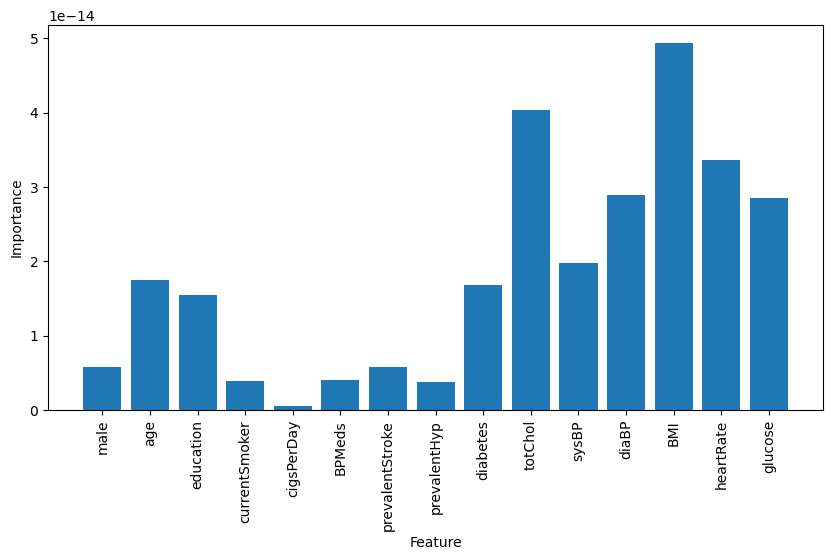

In [32]:
### Code here
weights = best_logreg.feature_importances_()
feature_names = list(heart_disease_df.columns[:-1]) 

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 5))
plt.bar(feature_names, np.mean(weights, axis = 1))
plt.xlabel('Feature', fontsize=10)
plt.ylabel('Importance', fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

In [35]:
#### Comment here
#It seems like BMI, totChol, heartRate and glucose contribute a lot to the final results 


# **Part 3: Support Vector Machines**

In this part, we will be using support vector machines for classification on the heart disease dataset.

### Train Primal SVM
**3.1 Train a primal SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [131]:
### Code here
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Report the accuracy on the training, validation, and test sets
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)

Train accuracy: 0.8524783634933124
Validation accuracy: 0.8455188679245284
Test accuracy: 0.8372641509433962


### Train Dual SVM
**3.2 Train a dual SVM (with default parameters) on the heart disease dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [132]:
### Code here
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train the SVM model with a 'rbf' kernel
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Report the accuracy on the training, validation, and test sets
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)


Train accuracy: 0.8583792289535799
Validation accuracy: 0.8466981132075472
Test accuracy: 0.8372641509433962
